# Example 2: Plotting temporal networks


## Conceptual introduction

Communication is important in science. There is a lot of complex information that we want to display in as simple ways possible. Conveying multi-dimensional information is hard. With temporal networks we have (at least) 3 different dimensions (nodes x nodes x time). It is also possible that additional dimensions play a part in research (such as subjects or groups).

How do we convey this information? One strategy is to resolve global properties, or isolate the nodes that are statistically significant. This often results in us able to plot this information in convenstional 1-3D ways.


## Plotting in teneto

Being able to view the network information through time is very useful. It is not a problem which has been solved adequately yet, but we present two solutions which are very helpful. They function best when networks are smaller. Please let me know (wiheto) if you know of better ways to plot temporal information in larger networks and I will be very happy to implement it.

Import dependencies and generate network (for network generation see example 03)

In [1]:
%matplotlib inline
import teneto
import numpy as np
import matplotlib.pyplot as plt

#Set colourmap
plt.rcParams['image.cmap'] = 'autumn'

Then we need to generate a binary undirected network to work with. Here we have 5 nodes over 10 time points. There is a 0.2% probability each 0. (see the generate_network example for more information)

In [2]:
np.random.seed(2017) # For reproduceability
# Number of nodes
N = 5
# Number of timepoints
T = 10
# Probability of edge activation
p0to1 = 0.2
p1to1 = .9
# Add node names into the network and say time units are years, go 1 year per graphlet and startyear is 2007
cfg={}
cfg['Fs'] = 1
cfg['timeunit'] = 'Years'
cfg['nLabs'] = ['Ashley','Blake','Casey','Dylan','Elliot']
cfg['t0'] = 2007 #First year in network
#Generate network
C = teneto.generatenetwork.rand_binomial([N,N,T],[p0to1, p1to1],'contact','bu',netinfo=cfg)

## slice_plots

Plotting tools are found in teneto.plot. Slice_plot's line up all the nodes for a time point into a "slice" and connect edges with curved lines. (More customizeability to these plots will be added in upcoming versions)

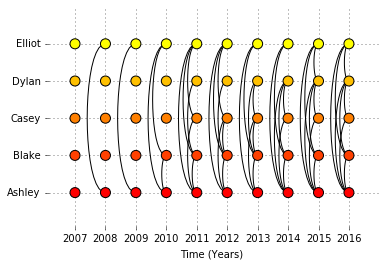

In [3]:
fig,ax = plt.subplots()
ax = plt.subplot(1,1,1)
ax = teneto.plot.slice_plot(C,ax)

## graphlet_stack_plot

Graphlet_stack_plot takes the temporal network input and automatically scales each 2D connectivity plots, creating a 3D effect, and stacks them up in a time series.

With only the generated network above (C), we then create a matplotlib figure and then call graphlet_stack_plot.

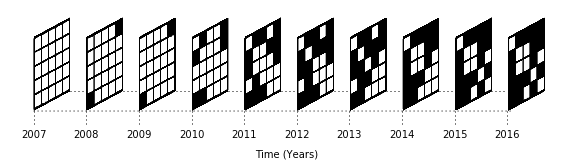

In [4]:
# Create matplotlib figure
fig,ax = plt.subplots(figsize=(10,3))
ax = plt.subplot(1,1,1)
colorMap = 'Greys'
# Call graphlet_stack_plot adding only specified parameters. (Only new parameter is "q" which stands for figure quality)
ax = teneto.plot.graphlet_stack_plot(C,ax,q=10,cmap=colorMap)

### Customizing graphlet_stack_plot

There are some possibilities to modify graphlet_stack_plot after ones own style over and above the default graphlet plot and specifying the colormap.

Below we see an example of customization by removing the grids between edge values, changing the border colour to a grey and making the border much larger. (This isn't pretty. But shows what can be done).

There are still a couple of restrictions. At the moment some border must be present. As too are the rounded rectangles border. But these, and more customizatoin, is possible to add quite easily (so feel free to request something that you feel is missing).

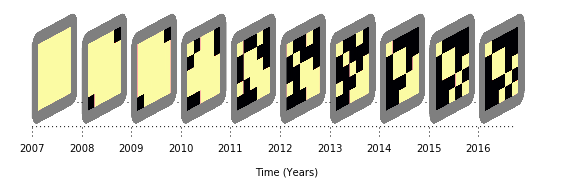

In [5]:
# Create matplotlib figure
fig,ax = plt.subplots(figsize=(10,3))
ax = plt.subplot(1,1,1)
colorMap = 'inferno_r'
# Call graphlet_stack_plot adding only specified parameters. (Only new parameter is "q" which stands for figure quality)
ax = teneto.plot.graphlet_stack_plot(C,ax,q=10,cmap=colorMap,gridcolor='none',borderwidth=15,bordercolor=[.5,.5,.5])

*Written for v0.1.4*